In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('recent_crime_dataset1.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 0325 0352 0378,0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,47,F,H,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,0928 1822,29,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1300 0385 1822,22,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542


In [291]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399


In [292]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 0325 0352 0378,0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,47,F,H,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,0928 1822,29,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1300 0385 1822,22,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542
19999,240315223,2024-10-08,10/08/2024 12:00:00 AM,800,3,Southwest,363,2,888,TRESPASSING,0910 1501,23,X,X,947.0,MTA - EXPO LINE - EXPO/CRENSHAW,515.0,PHYSICAL PRESENCE,IC,Invest Cont,888.0,NaN,NaN,NaN,4000 CRENSHAW BL,NaN,34.0120,-118.3351


In [293]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [294]:
df.shape

(20000, 28)

In [295]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [296]:
df.isna().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            5860
Vict Age              0
Vict Sex           5749
Vict Descent       5750
Premis Cd             2
Premis Desc           2
Weapon Used Cd    19038
Weapon Desc       19038
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          19774
Crm Cd 3          19996
Crm Cd 4          20000
LOCATION              0
Cross Street      17876
LAT                   0
LON                   0
dtype: int64

In [297]:
df.drop(df[['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street']],axis=1,inplace=True)
df.drop('Mocodes',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [298]:
df.isna().sum()

DR_NO              0
Date Rptd          0
DATE OCC           0
TIME OCC           0
AREA               0
AREA NAME          0
Rpt Dist No        0
Part 1-2           0
Crm Cd             0
Crm Cd Desc        0
Vict Age           0
Vict Sex        5749
Vict Descent    5750
Premis Cd          2
Premis Desc        2
Status             0
Status Desc        0
Crm Cd 1           0
LOCATION           0
LAT                0
LON                0
dtype: int64

In [299]:
#Fill missing values
#df['Weapon Desc'] = df['Weapon Desc'].fillna("Unknown")
df['Vict Sex'] = df['Vict Sex'].fillna("Unknown")
df['Vict Descent'] = df['Vict Descent'].fillna("Unknown")
df['Premis Desc'] = df['Premis Desc'].fillna("Unknown")
# df['Mocodes'] = df['Mocodes'].fillna("None")

In [300]:
# Convert dates
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce') #This line changes the 'DATE OCC' column into proper date format.   y value can't be changed, it becomes NaT 


In [301]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

In [302]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,250304283,2025-03-28,2025-03-27,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,3500 WATT WY,34.0223,-118.2865
1,250504258,2025-03-28,2025-03-01,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399
2,250504256,2025-03-28,2025-03-27,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399
3,250504257,2025-03-28,2025-02-25,940,5,Harbor,529,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,900 MCFARLAND AV,33.7819,-118.2527
4,250504255,2025-03-28,2025-03-27,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,241713416,2024-10-08,2024-10-08,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,X,X,203.0,OTHER BUSINESS,IC,Invest Cont,442.0,8800 CORBIN AV,34.2302,-118.5623
19996,240119663,2024-10-08,2024-09-25,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),47,F,H,203.0,OTHER BUSINESS,IC,Invest Cont,440.0,100 PASEO DE LA PLAZA,34.0615,-118.2412
19997,241713426,2024-10-08,2024-10-08,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,29,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,9700 DELCO AV,34.2467,-118.5787
19998,240711874,2024-10-08,2024-10-07,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,22,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,331.0,2200 S REDONDO BL,34.0379,-118.3542


In [303]:
# Time-based features
df['Hour'] = df['TIME OCC'] // 100  #This gets the hour when the crime happened.
df['Day of Week'] = df['DATE OCC'].dt.day_name()  #This finds the day of the week (like Monday or Friday).
df['Month'] = df['DATE OCC'].dt.month   #This gets the month number (1 for January, 2 for February, etc.).
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)  # This checks if the crime happened on a weekend and marks it as 1 (yes) or 0 (no).


In [304]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Hour,Day of Week,Month,Is Weekend
0,250304283,2025-03-28,2025-03-27,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,3500 WATT WY,34.0223,-118.2865,12,Thursday,3,0
1,250504258,2025-03-28,2025-03-01,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399,12,Saturday,3,1
2,250504256,2025-03-28,2025-03-27,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399,12,Thursday,3,0
3,250504257,2025-03-28,2025-02-25,940,5,Harbor,529,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,900 MCFARLAND AV,33.7819,-118.2527,9,Tuesday,2,0
4,250504255,2025-03-28,2025-03-27,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,0,Unknown,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 NAVY WY,33.7315,-118.2399,12,Thursday,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,241713416,2024-10-08,2024-10-08,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,X,X,203.0,OTHER BUSINESS,IC,Invest Cont,442.0,8800 CORBIN AV,34.2302,-118.5623,20,Tuesday,10,0
19996,240119663,2024-10-08,2024-09-25,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),47,F,H,203.0,OTHER BUSINESS,IC,Invest Cont,440.0,100 PASEO DE LA PLAZA,34.0615,-118.2412,14,Wednesday,9,0
19997,241713426,2024-10-08,2024-10-08,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,29,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,9700 DELCO AV,34.2467,-118.5787,12,Tuesday,10,0
19998,240711874,2024-10-08,2024-10-07,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,22,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,331.0,2200 S REDONDO BL,34.0379,-118.3542,20,Monday,10,0


In [305]:
# # Define binary target: Case Closed = 1 if closed
# closed_statuses = ['AA', 'JA', 'JO', 'AO']  # Customize as needed
# df['Case Closed'] = df['Status'].isin(closed_statuses).astype(int)


df['Case Closed'] = df['Status'].apply(lambda x: 0 if x == 'IC' else (1 if x in ['AO', 'AA', 'JA', 'JO'] else 0))


In [306]:
# Drop irrelevant or leak-prone columns
drop_cols = ['DR_NO', 'DATE OCC', 'Date Rptd','TIME OCC','AREA NAME', 'Status','Status Desc','Rpt Dist No','Vict Age','Premis Cd','Crm Cd 1','LAT','LON','Hour','Month','Is Weekend']
df = df.drop(columns=drop_cols)
df


,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,3,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,3500 WATT WY,Thursday,0
1,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Saturday,0
2,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Thursday,0
3,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,900 MCFARLAND AV,Tuesday,0
4,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
19995,17,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),X,X,OTHER BUSINESS,8800 CORBIN AV,Tuesday,0
19996,1,1,440,THEFT PLAIN - PETTY ($950 & UNDER),F,H,OTHER BUSINESS,100 PASEO DE LA PLAZA,Wednesday,0
19997,17,2,354,THEFT OF IDENTITY,M,W,SINGLE FAMILY DWELLING,9700 DELCO AV,Tuesday,0
19998,7,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2200 S REDONDO BL,Monday,0


In [308]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,3,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,3500 WATT WY,Thursday,0
1,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Saturday,0
2,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Thursday,0
3,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,900 MCFARLAND AV,Tuesday,0
4,5,1,510,VEHICLE - STOLEN,Unknown,Unknown,STREET,2500 NAVY WY,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
19995,17,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),X,X,OTHER BUSINESS,8800 CORBIN AV,Tuesday,0
19996,1,1,440,THEFT PLAIN - PETTY ($950 & UNDER),F,H,OTHER BUSINESS,100 PASEO DE LA PLAZA,Wednesday,0
19997,17,2,354,THEFT OF IDENTITY,M,W,SINGLE FAMILY DWELLING,9700 DELCO AV,Tuesday,0
19998,7,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2200 S REDONDO BL,Monday,0


In [309]:
df.isna().sum()

AREA            0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Sex        0
Vict Descent    0
Premis Desc     0
LOCATION        0
Day of Week     0
Case Closed     0
dtype: int64

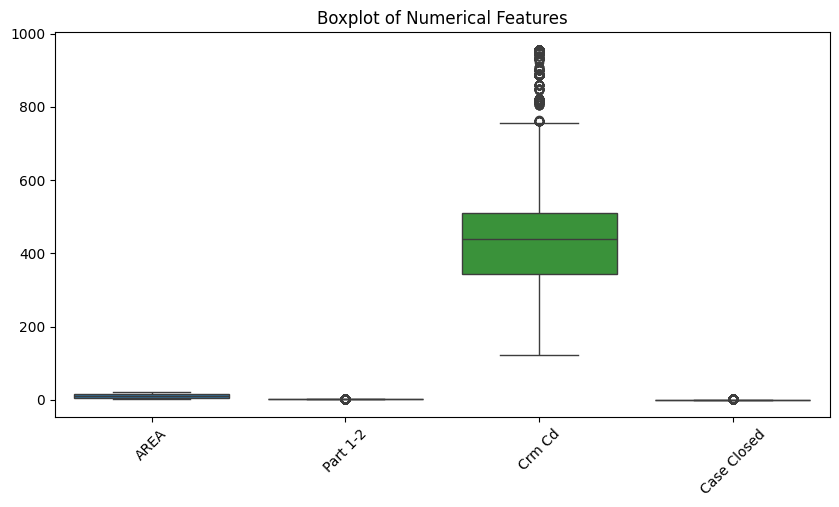

In [310]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45) 
plt.show()


In [311]:
correlation=df.corr(numeric_only=True)
correlation


,AREA,Part 1-2,Crm Cd,Case Closed
AREA,1.000000,0.016263,-0.028477,0.031347
Part 1-2,0.016263,1.000000,0.589214,0.061445
Crm Cd,-0.028477,0.589214,1.000000,0.092094
Case Closed,0.031347,0.061445,0.092094,1.000000


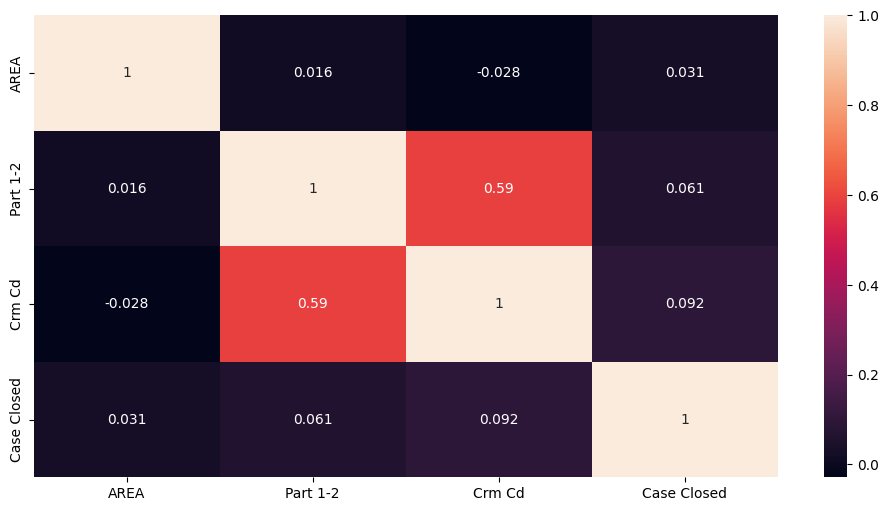

In [312]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [313]:
df.dtypes

AREA             int64
Part 1-2         int64
Crm Cd           int64
Crm Cd Desc     object
Vict Sex        object
Vict Descent    object
Premis Desc     object
LOCATION        object
Day of Week     object
Case Closed      int64
dtype: object

In [314]:
a=df['Vict Sex'].value_counts()
a

Vict Sex
M          6304
Unknown    5749
F          5171
X          2774
H             2
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Victim Sex')

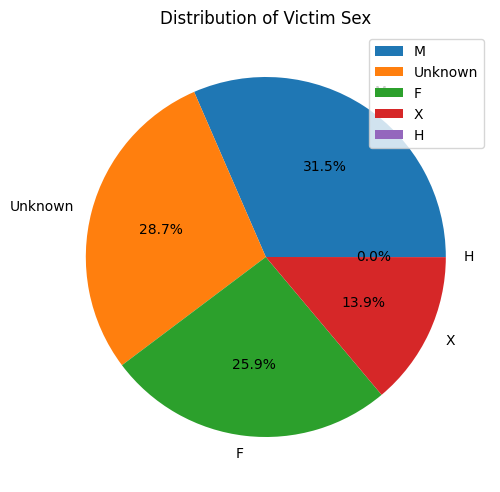

In [315]:
plt.pie(a.values,labels=a.index,autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.tight_layout()
plt.title("Distribution of Victim Sex")

In [350]:
#f.drop(df.index[(df['Vict Sex']=='X')],axis=0,inplace=True)
df.drop(df.index[(df['Vict Sex']=='H')],axis=0,inplace=True)


In [351]:
df.reset_index(drop=True,inplace=True)
df.shape

(17224, 10)

In [352]:
b=df["Part 1-2"].value_counts()
b

Part 1-2
1    13516
2     3708
Name: count, dtype: int64

Text(0.5, 1.0, 'Part 1-2 Count graph')

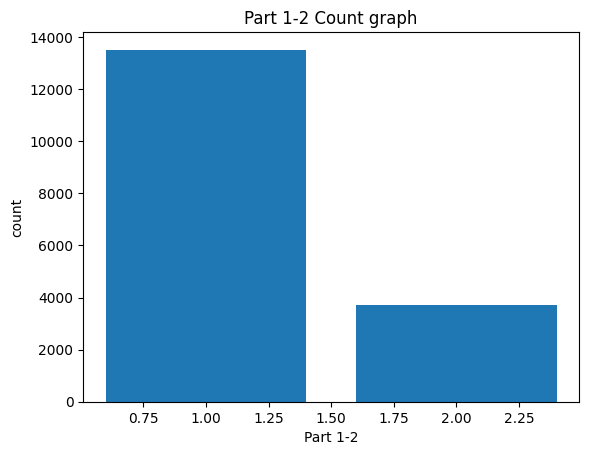

In [353]:
plt.bar(b.index,b.values)
plt.xlabel("Part 1-2")
plt.ylabel("count")
plt.title("Part 1-2 Count graph")

In [ ]:
# # Encode categorical features
lab=LabelEncoder()
df['Crm Cd Desc']=lab.fit_transform(df['Crm Cd Desc'])
df['Vict Sex']=lab.fit_transform(df['Vict Sex'])
df['Vict Descent']=lab.fit_transform(df['Vict Descent'])
df['Premis Desc']=lab.fit_transform(df['Premis Desc'])
df['LOCATION']=lab.fit_transform(df['LOCATION'])
df['Day of Week']=lab.fit_transform(df['Day of Week'])


In [321]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,3,1,510,80,2,15,146,5370,4,0
1,5,1,510,80,2,15,146,4520,2,0
2,5,1,510,80,2,15,146,4520,4,0
3,5,1,510,80,2,15,146,9061,5,0
4,5,1,510,80,2,15,146,4520,4,0
...,...,...,...,...,...,...,...,...,...,...
17219,15,1,510,80,2,15,56,6825,5,0
17220,14,1,330,15,1,11,102,8858,1,0
17221,1,1,440,72,0,6,110,33,6,0
17222,17,2,354,71,1,17,138,9419,5,0


In [322]:
# --- Modeling --- #
X = df.drop(columns=['Case Closed'])
y = df['Case Closed']


In [323]:
X

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week
0,3,1,510,80,2,15,146,5370,4
1,5,1,510,80,2,15,146,4520,2
2,5,1,510,80,2,15,146,4520,4
3,5,1,510,80,2,15,146,9061,5
4,5,1,510,80,2,15,146,4520,4
...,...,...,...,...,...,...,...,...,...
17219,15,1,510,80,2,15,56,6825,5
17220,14,1,330,15,1,11,102,8858,1
17221,1,1,440,72,0,6,110,33,6
17222,17,2,354,71,1,17,138,9419,5


In [324]:
y.value_counts()

Case Closed
0    16755
1      469
Name: count, dtype: int64

In [325]:
# Train-test split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
X_train

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week
1695,5,1,330,15,1,6,133,2202,0
648,12,1,440,72,0,1,137,7709,0
16988,15,1,331,68,0,6,146,7721,5
13048,6,1,510,80,2,15,146,7680,2
4171,12,1,510,80,2,15,146,7948,1
...,...,...,...,...,...,...,...,...,...
8333,18,1,510,80,2,15,146,8049,3
5842,18,1,510,80,2,15,146,2701,4
8126,17,1,440,72,0,6,125,1105,3
427,20,1,440,72,1,4,146,3288,2


In [326]:
# Find max allowed ratio
max_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Max Allowed Sampling Ratio: {max_ratio:.2f}")

Max Allowed Sampling Ratio: 35.70


In [327]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [328]:
y_train_smote.value_counts()

Case Closed
0    12566
1    12566
Name: count, dtype: int64

In [329]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train_smote)
X_train=scalar.transform(X_train_smote)
X_test=scalar.transform(X_test)
X_train

array([[-1.09597339, -0.57649262, -0.90570425, ...,  0.40889213,
        -1.0724664 , -1.45685812],
       [ 0.13114963, -0.57649262, -0.31644775, ...,  0.51540164,
         0.75327834, -1.45685812],
       [ 0.65705949, -0.57649262, -0.90034738, ...,  0.75504803,
         0.75725672,  1.2372317 ],
       ...,
       [-0.9206701 , -0.57649262,  0.26209501, ...,  0.88818491,
        -0.17832557, -1.45685812],
       [-0.39476024, -0.57649262,  0.57815077, ...,  0.14261836,
        -0.28010578, -0.91804016],
       [ 1.53357593, -0.57649262, -0.31109087, ..., -2.06745393,
        -0.46609503,  0.69841374]], shape=(25132, 9))

In [359]:
# metrics
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# cm

In [358]:
# metrics
# from sklearn.metrics import classification_report
# report=classification_report(y_test,y_pred)
# print(report)

In [357]:
# from sklearn.metrics import accuracy_score
# score=accuracy_score(y_test,y_pred)
# score

In [356]:
# pd.set_option('display.max_columns',None)
# df

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=7)
# knn.fit(X_train_smote,y_train_smote)
# y_pred=knn.predict(X_test)
# y_pred

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

Dt_entropy=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=5,class_weight='balanced')

rf=RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced')

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

models=[Dt_entropy,rf,brf]
model_name=["DecisionTreeClassifier","RandomForest","BalancedRandomForestClassifier"]

In [342]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,classification_report,precision_score,ConfusionMatrixDisplay

In [343]:
import warnings
warnings.filterwarnings('ignore')

In [344]:
for i,j in zip(models,model_name):
    i.fit(X_train_smote,y_train_smote)
    y_pred=i.predict(X_test)
    print("",j,"*")
    print('Accuracy_score = ',accuracy_score(y_test,y_pred))
    print('recall = ',recall_score(y_test,y_pred))
    print("Precision = ",precision_score(y_test,y_pred))
    print("Classification Report \n",classification_report(y_test,y_pred))

 DecisionTreeClassifier(Entropy) *
Accuracy_score =  0.02717138875986995
recall =  1.0
Precision =  0.02717138875986995
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4189
           1       0.03      1.00      0.05       117

    accuracy                           0.03      4306
   macro avg       0.01      0.50      0.03      4306
weighted avg       0.00      0.03      0.00      4306

 RandomForest *
Accuracy_score =  0.8135160241523456
recall =  0.05128205128205128
Precision =  0.008595988538681949
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      4189
           1       0.01      0.05      0.01       117

    accuracy                           0.81      4306
   macro avg       0.49      0.44      0.46      4306
weighted avg       0.94      0.81      0.87      4306

 XGBoost *
Accuracy_score =  0.02717138875986995
recall =  1.

In [361]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,max_depth=6)
rf.fit(X_train_smote,y_train_smote)
y_pred_rf=rf.predict(X_test)

In [362]:
print(rf.predict(scalar.transform([[1,2,180,56,0,9,24,6745,0]])))

[1]


In [366]:
ac_score=accuracy_score(y_test,y_pred)
ac_score

0.9728286112401301

In [345]:
# from collections import Counter
y_test.value_counts()

Case Closed
0    4189
1     117
Name: count, dtype: int64

In [367]:
import joblib
joblib.dump(rf,'Case Status.pkl')

['Case Status.pkl']

In [368]:
joblib.dump(lab,'Label_Encoder.pkl')

['Label_Encoder.pkl']